# TGFB3
Pathogenic variants in TGFB3 are associated with both 
[Arrhythmogenic right ventricular dysplasia 1 (OMIM:107970)](https://omim.org/entry/107970)	and
[Loeys-Dietz syndrome 5	(OMIM:615582)](https://omim.org/entry/615582).

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2025-01-16
Using gpsea version 0.9.4


### TGFB3
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for TGFB3.

In [2]:
from gpsea.preprocessing import configure_default_protein_metadata_service
gene_symbol = 'TGFB3'
mane_tx_id = 'NM_003239.5'
mane_protein_id = 'NP_003230.1' # transforming growth factor beta-3 proprotein isoform 1 preproprotein
pms = configure_default_protein_metadata_service()
protein_meta = pms.annotate(mane_protein_id)

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.24") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, validation = load_phenopackets(  
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 75/75 [00:00<00:00, 271.65 individuals/s]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
28,Aortic root aneurysm
23,Tall stature
23,Hypertelorism
16,Arachnodactyly
16,Retrognathia
15,Scoliosis
12,Mitral valve prolapse
12,Bifid uvula
11,Long face
10,Cleft palate


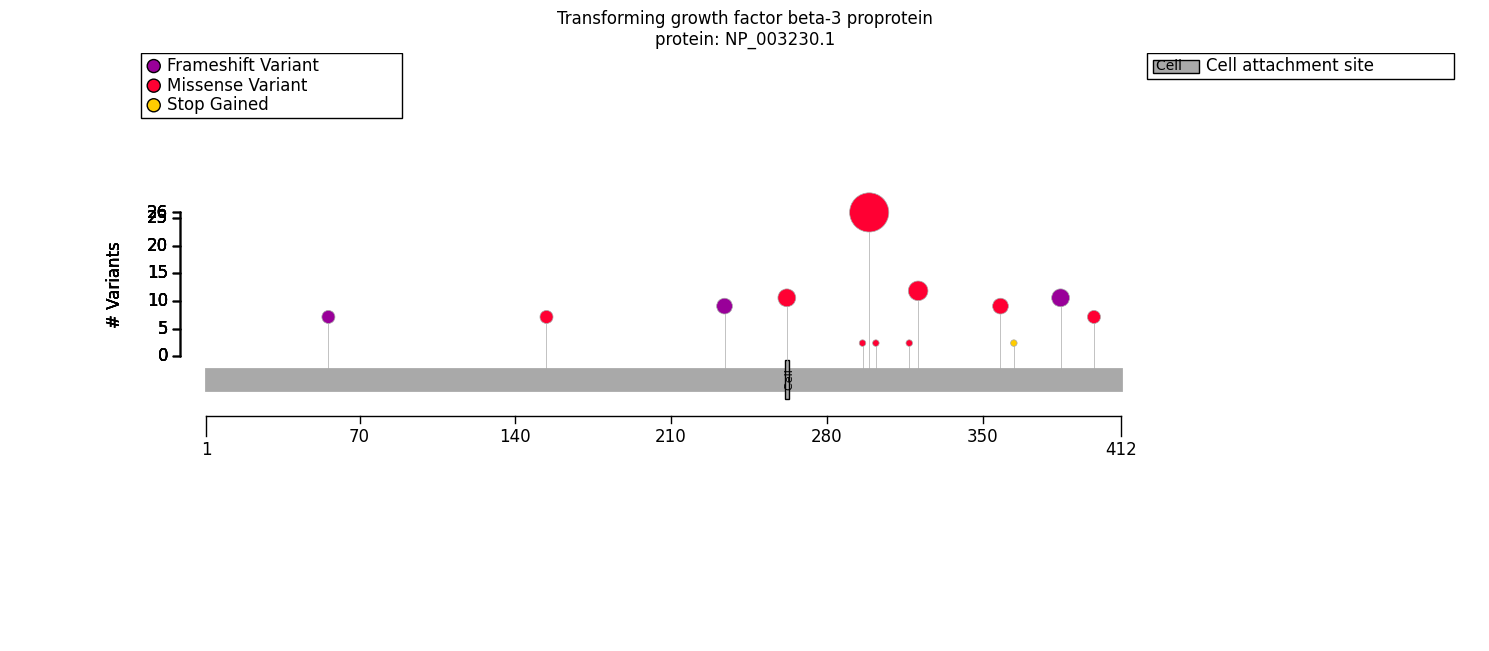

In [5]:
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

tgfb3_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein(
    protein_metadata=protein_meta,
    cohort=cohort,
    ax=ax,
)
tgfb3_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
4,Cell attachment site,Motif,262 - 263,p.Asp263His


# Genotype-Phenotype Correlation (GPC) Analysis

In [7]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [8]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import variant_key
from gpsea.analysis.clf import monoallelic_classifier

asp263his = variant_key(key="14_75963455_75963455_C_G") # c.787G>C; p.Asp263His

asp263his_clf = monoallelic_classifier(
    a_predicate=asp263his,
    b_predicate=~asp263his,
    a_label="Asp263His",
    b_label="Other"
)

asp263his_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=asp263his_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(asp263his_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,56
HMF03,Skipping term because of a child term with the same individual counts,1
HMF05,Skipping term because one genotype had zero observations,2
HMF08,Skipping general term,60
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,130


In [9]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=asp263his_result)

Allele group,Asp263His,Other,Corrected p values,p values
Dolichocephaly [HP:0000268],1/1 (100%),7/33 (21%),1.0,0.235294
Aortic root aneurysm [HP:0002616],3/4 (75%),25/54 (46%),1.0,0.344498
Retrognathia [HP:0000278],1/1 (100%),15/40 (38%),1.0,0.390244
Abnormal axial skeleton morphology [HP:0009121],1/1 (100%),32/32 (100%),1.0,1.000000
Thoracic aortic aneurysm [HP:0012727],3/3 (100%),28/28 (100%),1.0,1.000000
Aortic aneurysm [HP:0004942],3/3 (100%),29/29 (100%),1.0,1.000000
Vascular dilatation [HP:0002617],3/3 (100%),30/30 (100%),1.0,1.000000
Abnormal aortic morphology [HP:0001679],3/3 (100%),30/30 (100%),1.0,1.000000
Abnormal systemic arterial morphology [HP:0011004],3/3 (100%),33/33 (100%),1.0,1.000000
Abnormal blood vessel morphology [HP:0033353],3/3 (100%),36/36 (100%),1.0,1.000000


In [10]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)

missense_clf = monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group,Missense,Other,Corrected p values,p values
Varicose veins [HP:0002619],3/22 (14%),6/12 (50%),0.483750,0.040313
Aortic root aneurysm [HP:0002616],15/38 (39%),13/20 (65%),0.583817,0.097303
Retrognathia [HP:0000278],9/28 (32%),7/13 (54%),1.000000,0.302388
Tall stature [HP:0000098],13/33 (39%),10/22 (45%),1.000000,0.781782
Thoracic aortic aneurysm [HP:0012727],16/16 (100%),15/15 (100%),1.000000,1.000000
Aortic aneurysm [HP:0004942],16/16 (100%),16/16 (100%),1.000000,1.000000
Abnormal aortic morphology [HP:0001679],16/16 (100%),17/17 (100%),1.000000,1.000000
Vascular dilatation [HP:0002617],17/17 (100%),16/16 (100%),1.000000,1.000000
Abnormal systemic arterial morphology [HP:0011004],17/17 (100%),19/19 (100%),1.000000,1.000000
Abnormal blood vessel morphology [HP:0033353],18/18 (100%),21/21 (100%),1.000000,1.000000


In [11]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo, mf_result)

Sex,FEMALE,MALE,Corrected p values,p values
Dolichocephaly [HP:0000268],0/14 (0%),8/20 (40%),0.128900,0.010884
Aortic root aneurysm [HP:0002616],8/26 (31%),20/32 (62%),0.128900,0.019831
Tall stature [HP:0000098],7/25 (28%),16/30 (53%),0.427783,0.098719
Hypertelorism [HP:0000316],12/21 (57%),11/27 (41%),1.000000,0.382959
Long face [HP:0000276],6/15 (40%),5/20 (25%),1.000000,0.467408
Retrognathia [HP:0000278],7/16 (44%),9/25 (36%),1.000000,0.746053
Aortic aneurysm [HP:0004942],10/10 (100%),22/22 (100%),1.000000,1.000000
Vascular dilatation [HP:0002617],10/10 (100%),23/23 (100%),1.000000,1.000000
Abnormal aortic morphology [HP:0001679],10/10 (100%),23/23 (100%),1.000000,1.000000
Abnormal axial skeleton morphology [HP:0009121],12/12 (100%),21/21 (100%),1.000000,1.000000


# Summary
We found no evidence for genotype-phenotype correlations.

In [12]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

fet_results = (
    GPAnalysisResultSummary.from_multi(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=asp263his_result,
    ),
    GPAnalysisResultSummary.from_multi(
        result=mf_result,
    ),
)

caption = "No significant correlations identified."

report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=fet_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [13]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
Missense,Other,12,0
Genotype (A),Genotype (B),Tests performed,Significant tests
Asp263His,Other,10,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,13,0


In [14]:
summarizer.process_latex(report=report, protein_fig=tgfb3_fig)

Figure saved to ../../supplement/img/TGFB3_protein_diagram-draft.pdf
Output to ../../supplement/tex/TGFB3_summary_draft.tex
